In [1]:
from keras.models import load_model

In [2]:
model = load_model("saved_model.h5")

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

In [4]:
from keras.utils import plot_model

In [20]:
plot_model(model,  to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [9]:
img=cv2.imread('C:/Users/user/Desktop/Project Stuff/test/642.jpg', cv2.IMREAD_GRAYSCALE)

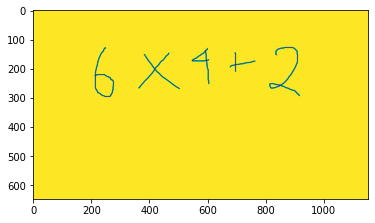

In [10]:
plt.imshow(img)

In [11]:
if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

5
0
[[212, 128, 66, 170], [363, 146, 142, 125], [546, 130, 60, 124], [677, 145, 88, 67], [813, 127, 105, 168]]


In [12]:
equation=''

for i in range(len(train_data)):
    
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
        
    for j in range(10) :
        if result[0] == j :
            equation = equation + str(j)
    
    if result[0] == 10 :
        equation = equation + "+"
    if result[0] == 11 :
        equation = equation + "-"
    if result[0] == 12 :
        equation = equation + "*"
    if result[0] == 13 :
        equation = equation + "/"
    if result[0] == 14 :
        equation = equation + "="
    if result[0] == 15 :
        equation = equation + "."
    if result[0] == 16 :
        equation = equation + "x"
    if result[0] == 17 :
        equation = equation + "y"      
    if result[0] == 18 :
        equation = equation + "z"
    
print("Your Equation :", equation)

1/1 [==============================] - 0s 59ms/step
Your Equation : 6*442
